In [15]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(ggplot2)

In [16]:
#for reproducability
set.seed(7)

#demonstrate the dataset can be read from the web into R
caffeine <-read_csv("caffeine.csv")

#changing column names
colnames(caffeine) <- make.names(colnames(caffeine))

#creating the factor and selecting variables needed for prediction
caffeine_selected <- caffeine %>%
mutate(type = as_factor(type)) %>%
select(Calories, Caffeine..mg., type,Volume..ml. )

#scaling the calorie and caffeine content by the drink volume in mL
caffeine_scaled_volume <- caffeine_selected %>%
mutate (calories_scaled = Calories / Volume..ml.) %>%
mutate (caffeine_scaled = Caffeine..mg. / Volume..ml.) %>%
#selecting only the columns we are interested in now 
select (type, calories_scaled, caffeine_scaled)

caffeine_scaled_volume

Parsed with column specification:
cols(
  drink = col_character(),
  `Volume (ml)` = col_double(),
  Calories = col_double(),
  `Caffeine (mg)` = col_double(),
  type = col_character()
)



type,calories_scaled,caffeine_scaled
<fct>,<dbl>,<dbl>
Coffee,0.000000000,1.07784737
Coffee,0.000000000,0.57955534
Coffee,0.599540009,0.39969334
Coffee,0.000000000,1.71868136
Coffee,0.000000000,0.26379760
Coffee,0.684332096,0.64407727
Coffee,0.333965990,0.55939303
Coffee,0.223769492,0.77076158
Coffee,0.728302755,0.62425950


Loading the dataset onto R and making the column names readable. Then changing _type_ to be the factor as we want to know what type of drink is present. From the dataset, we are selecting Calories, Caffeine, Volume, and type to use for prediction after scaling to normalize our predictors.

[1] "Coffee"        "Energy Drinks" "Energy Shots"  "Soft Drinks"  
[5] "Tea"           "Water"

`summarise()` ungrouping output (override with `.groups` argument)



type,count,percentage
<chr>,<int>,<dbl>
Coffee,173,28.360656
Energy Drinks,219,35.901639
Energy Shots,36,5.901639
Soft Drinks,90,14.754098
Tea,66,10.819672
Water,26,4.262295


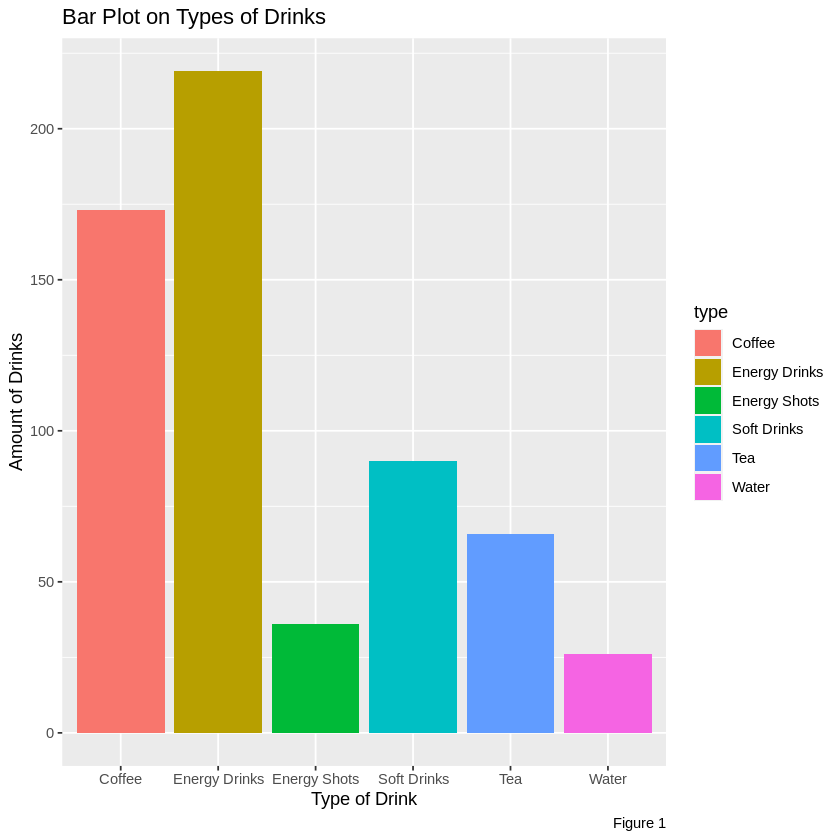

In [17]:
#returning each categroy in the column
caffeine_pull = caffeine_selected %>%
    pull(type) %>%
    levels()
caffeine_pull

#creates a chart that shows the variables with counts and percentages 
caffeine_obs = nrow(caffeine)
    caffeine %>%
    group_by(type) %>% 
    summarize(
        count = n(),
        percentage = n() / caffeine_obs * 100 )

#visualizing the summary of data
caffeine_bar <- ggplot(caffeine,aes(type)) +
    geom_bar(aes(fill = type)) +
    labs(x = "Type of Drink", y= "Amount of Drinks", caption = "Figure 1") +
    ggtitle("Bar Plot on Types of Drinks")

caffeine_bar

To summarize the data, from the _type_ factor initialized above, the categories in _type_ has been listed. A 6x3 tibble has also been created to further summarize the total in each group and a Bar Plot (Figure 1) to represent the distribution.

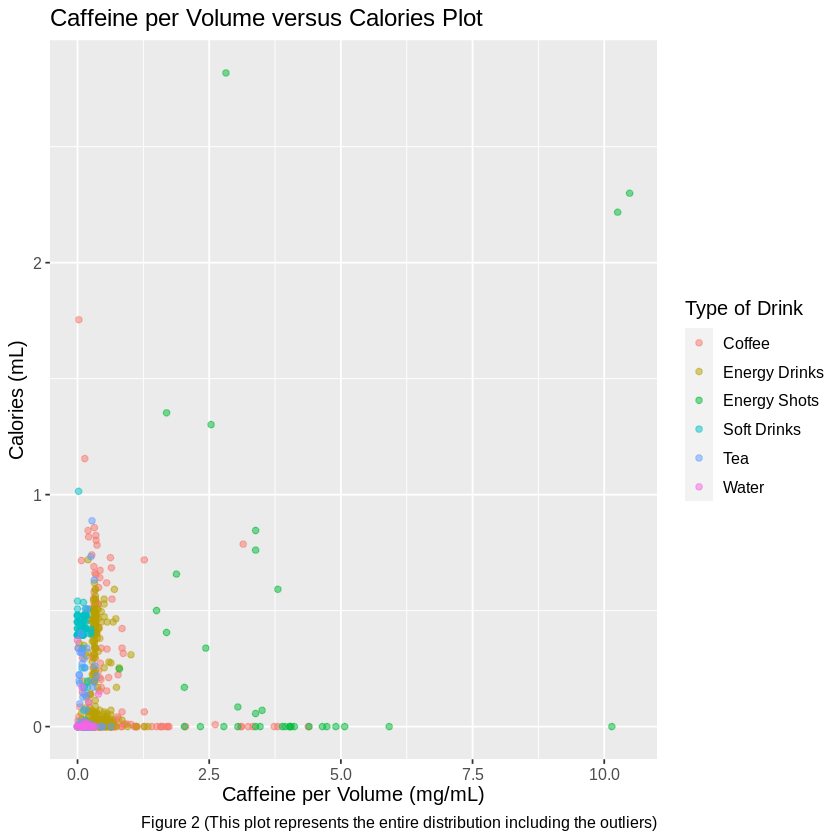

In [18]:
#creating plot for scaled caffeine (mg/mL) and calorires
caffeine_plot = caffeine_scaled_volume %>%
    ggplot(aes(x = caffeine_scaled, y = calories_scaled, color = type)) +
    geom_point(alpha = 0.5) +
    labs(x = "Caffeine per Volume (mg/mL)", y="Calories (mL)",color = "Type of Drink", 
         caption = "Figure 2 (This plot represents the entire distribution including the outliers)") +
    theme(text = element_text(size = 12)) +
    ggtitle("Caffeine per Volume versus Calories Plot")

caffeine_plot

Created a scatter plot to show the distribution of Caffeiene per Volume against Calories. This scatter plot shows the entire dataset including the outliers.

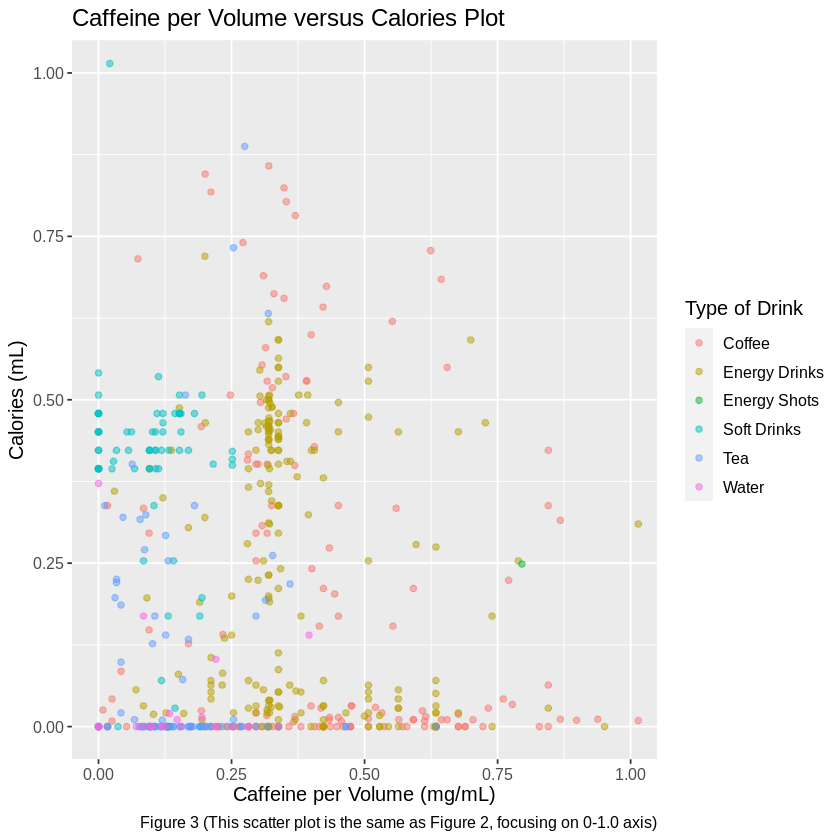

In [19]:
#focusing in on plot and removing outliers 
caffeine_plot_2 = caffeine_scaled_volume %>%
    ggplot(aes(x = caffeine_scaled, y = calories_scaled, color = type)) +
    geom_point(alpha = 0.5) +
    coord_cartesian(xlim =c(0, 1), ylim = c(0, 1)) +
    labs(x = "Caffeine per Volume (mg/mL)", y="Calories (mL)",color = "Type of Drink", 
         caption = "Figure 3 (This scatter plot is the same as Figure 2, focusing on 0-1.0 axis)") +
    theme(text = element_text(size = 12)) +
    ggtitle("Caffeine per Volume versus Calories Plot")
#caption in labs 
caffeine_plot_2

From Figure 2, this scatter plot represents the same dataset, but removing the outliers and focusing within the axis of 0-1.0. This allows us to get a better understanding and representation on most of the points in our dataset. 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5427262,5,0.02298352,Model01
2,accuracy,multiclass,0.5449484,5,0.02339733,Model02
3,accuracy,multiclass,0.5644237,5,0.02820296,Model03
4,accuracy,multiclass,0.5604063,5,0.01947033,Model04
5,accuracy,multiclass,0.5643322,5,0.01110879,Model05
6,accuracy,multiclass,0.5731265,5,0.01309592,Model06
7,accuracy,multiclass,0.5665300,5,0.01913683,Model07
8,accuracy,multiclass,0.5686821,5,0.02240330,Model08
9,accuracy,multiclass,0.5842652,5,0.02575513,Model09


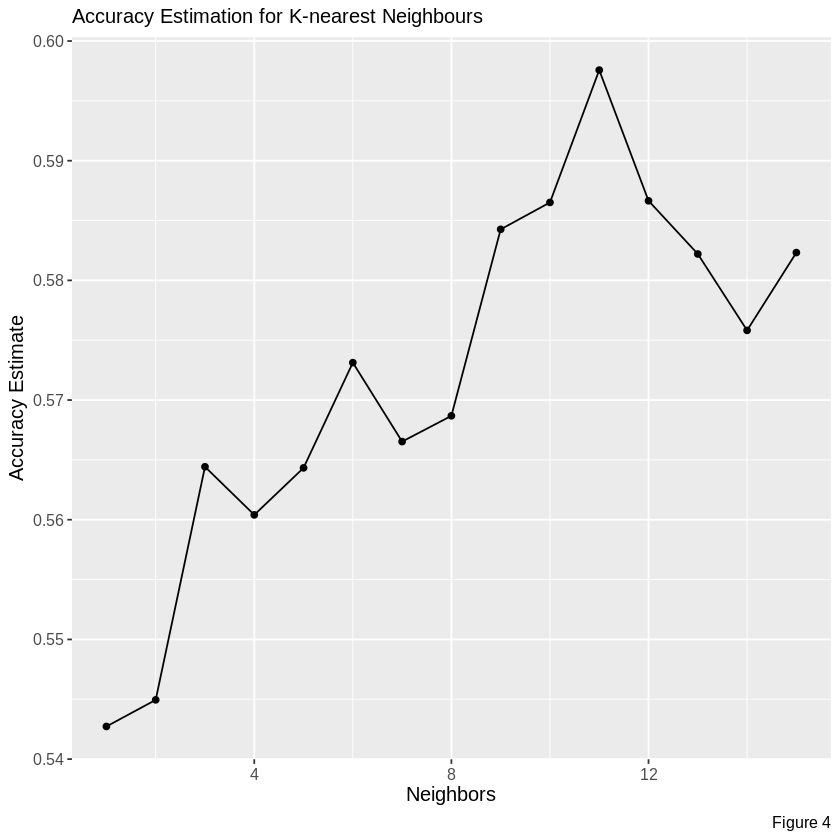

In [20]:
#tuning (choosing the best K)

set.seed(7)
#creating a training set and splitting the data into 75% training, and 25% testing
caffeine_split <- initial_split(caffeine_scaled_volume, prop = 0.75, strata = type)
caffeine_train <- training(caffeine_split)
caffeine_test <- testing(caffeine_split)

#creating classification K nearest neighbours
knn_spec <- nearest_neighbor(weight_func= "rectangular", neighbors = tune()) %>%
set_engine ("kknn") %>%
set_mode("classification")

#standardizing data
caffeine_recipe <- recipe(type ~ ., data = caffeine_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

#creating folds within training set
caffeine_vfold <- vfold_cv(caffeine_train, v = 5, strata = type)

#creating workflow
knn_results <- workflow() %>%
add_recipe(caffeine_recipe) %>%
add_model(knn_spec) %>%
tune_grid(resamples = caffeine_vfold, grid = 100) %>%
collect_metrics()

#checking the accuracy from the workflow
accuracies <- knn_results %>%
filter(.metric == "accuracy")
accuracies

#plot accuracy vs. K to find the best K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
labs(x = "Neighbors", y = "Accuracy Estimate", subtitle = "Accuracy Estimation for K-nearest Neighbours", 
     caption = "Figure 4") + 
theme(text = element_text(size = 12))

accuracy_vs_k

#note mean is the accuracy percent : 59.8% for K=11

Beginning our K-nearest neighbours classification by splitting the dataset into 75% training and 25% testing. The data has also been standardized while creating a workflow along with folds to test for accuracy. From the plot above, the accuracy is at 59.8% for K=11.

In [21]:
#predicting the class for observation using
#the K found through tuning

#predicting observation based on 11 neighbours
knn_spec <- nearest_neighbor(weight_func= "rectangular", neighbors = 11) %>%
set_engine ("kknn") %>%
set_mode("classification")

caffeine_recipe <- recipe(type ~ ., data = caffeine_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

knn_fit <- workflow() %>%
add_recipe(caffeine_recipe) %>%
add_model(knn_spec) %>%
fit(data = caffeine_scaled_volume)

new_obs <- tibble(calories_scaled = 0.1, caffeine_scaled = 0.5)
class_prediction <- predict(knn_fit, new_obs)

class_prediction

.pred_class
<fct>
Energy Drinks


Making a prediction on the type of drink from using the 25% testing created above. We are choosing the 11 nearest neighbours for this prediction as it gives us the best accuracy. From the predicted class, Energy Drinks were predicted.

In [22]:
caffeine_predictions <- predict (knn_fit, caffeine_test) %>%
bind_cols(caffeine_test)

metrics <- caffeine_predictions %>%
metrics (truth = type, estimate = .pred_class) %>%
filter (.metric == "accuracy")

metrics
#create confusion matrix
confusion <- caffeine_predictions %>%
conf_mat(truth = type, estimate = .pred_class)

confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6490066


               Truth
Prediction      Coffee Energy Drinks Energy Shots Soft Drinks Tea Water
  Coffee            25            13            2           0   4     1
  Energy Drinks     16            37            1           2   4     2
  Energy Shots       2             0            7           0   0     0
  Soft Drinks        0             1            0          19   1     2
  Tea                0             1            0           1   8     0
  Water              0             0            0           0   0     2

To further investigate our accuracy, we have created a confusion matrix for a visual understanding and to find the performance of the classification algorithm.